# DNN: analysis with Keras of 2D data

In [8]:
import numpy as np

from keras.models import Sequential
from keras.layers import Dense, Dropout
import keras_tuner

import matplotlib as mpl
import matplotlib.pyplot as plt
# default font
plt.rcParams['font.size'] = 13

from sklearn.preprocessing import StandardScaler #one can 

%run useful.py

# training data
perc_train = 0.8

## Read data

(2000, 8)
8
[1.83918812 2.04560279 5.67725029 5.95544703 9.6451452  6.53177097
 7.48906638 6.53569871] 1
[7.47714809 9.61306736 0.08388298 1.06444377 2.98703714 6.56411183
 8.09812553 8.72175914] 0
[9.64647597 7.23685347 6.42475328 7.17453621 4.67599007 3.25584678
 4.39644606 7.29689083] 0
[9.94014586 6.76873712 7.90822518 1.70914258 0.26849276 8.00370244
 9.03722538 0.2467621 ] 0
[4.91747318 5.26255167 5.9636601  0.51957545 8.95089528 7.2826618
 8.18350011 5.00222753] 1
data: 2000
train: 1600


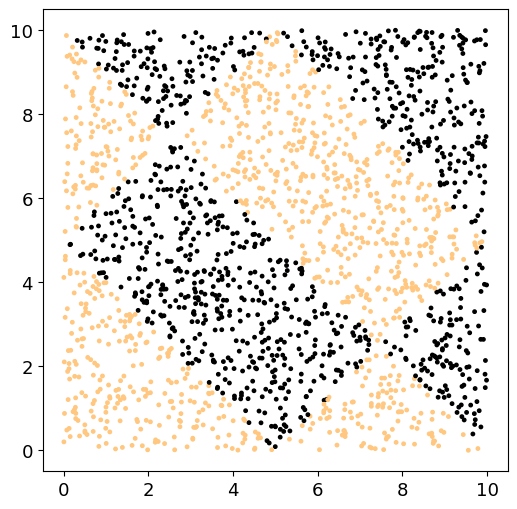

In [9]:
# Keras works with numpy arrays: just use them from the start

TYPE=3
# data point size
L=8
# span of each component
B=10
x = np.loadtxt(filename("data",L,TYPE), delimiter=' ')
y = np.loadtxt(filename("labels",L,TYPE), delimiter=' ')
y = y.astype("int")
print(x.shape)
N = len(x)
# average and std.dev.
x_mean = np.mean(x,axis=0)
x_std  = np.std(x,axis=0)


# dim. of a sample
L = len(x[0])
print(L)

for i in range(5):
    print(x[i],y[i])

N_train = int(perc_train * N)
print(f'data: {N}\ntrain: {N_train}')

plot_data(x,y)

## Standardize data

In [10]:
print("before rescaling:\nmean value=", x_mean,"\nstd. dev.=",x_std)
def Standardize(x,m,s):
    """
    rescale each component using its mean and standard deviation
    """
    N = len(x)
    # assuming len(m)=len(s)=len(x[0])
    mm,ss = np.tile(m,(N,1)), np.tile(s,(N,1))
    return (x-mm)/ss
x = Standardize(x,x_mean,x_std)
print("after rescaling:\nmean value=", x.mean(axis=0),"\nstd. dev.=",x.std(axis=0))

before rescaling:
mean value= [5.01860571 5.01726228 5.02153857 5.08947968 5.10248206 5.03670082
 4.88645281 5.05411547] 
std. dev.= [2.86912607 2.89535235 2.87312372 2.86324409 2.90278676 2.91948328
 2.92549254 2.89281292]
after rescaling:
mean value= [ 2.53633226e-15  9.27924404e-16 -1.44884105e-15 -2.38371996e-15
 -2.85274582e-15 -2.02196593e-15 -1.09010023e-15 -1.53632662e-15] 
std. dev.= [1. 1. 1. 1. 1. 1. 1. 1.]


## Split training and test data

In [11]:
(x_train, y_train) = (x[0:N_train],y[0:N_train])
(x_valid, y_valid) = (x[N_train:],y[N_train:])
print("Train:",len(x_train),"\t Validation:",len(x_valid))

Train: 1600 	 Validation: 400


## Define the model with Keras / Tensorflow

In [14]:
# reproducibility (?)
np.random.seed(12345)
import tensorflow.random as tf_r
tf_r.set_seed(12345)

# We use case 1
CASE=1 # we like case= 1



if CASE==1:
    model = Sequential()
    model.add(Dense(L,input_shape=(L,),activation='relu'))
    model.add(Dense(20,activation='relu'))
    model.add(Dropout(0.1))
    model.add(Dense(20,activation='relu'))
    model.add(Dropout(0.1))
    model.add(Dense(20,activation='relu'))
    model.add(Dropout(0.1))
    model.add(Dense(1,activation='sigmoid')) #sigmoid bc we want to classifi the number, and sigmoid interpolates btween 0 and 1
    nepoch=400 #number of times model is trained for every element
# as case 1 but one layer shorter
if CASE==2:
    model = Sequential()
    model.add(Dense(L,input_shape=(L,),activation='relu'))
    model.add(Dense(40,activation='relu'))
    model.add(Dropout(0.1))
    model.add(Dense(20,activation='relu'))
    model.add(Dropout(0.1))
    model.add(Dense(1,activation='sigmoid'))
    nepoch=400
#deeper
if CASE==3:
    model = Sequential()
    model.add(Dense(L,input_shape=(L,),activation='relu'))
    model.add(Dense(10,activation='relu'))
    model.add(Dense(10,activation='relu'))
    model.add(Dense(10,activation='relu'))
    model.add(Dense(10,activation='relu'))
    model.add(Dense(10,activation='relu'))
    model.add(Dense(10,activation='relu'))
    model.add(Dense(1,activation='sigmoid'))
    nepoch=400
#################################################################################################################################################################################################    
## Finisce Gigi  questa funzione se non è un problema 
################################################################################################################################################################################################
def build_model(hp):
    model = Sequential()
    model.add(Dense(L,input_shape=(L,),activation=hp.Choice('activation0', ['sigmoid','relu','elu'])))
    model.add(Dense(20,activation=hp.Choice('activation1', ['sigmoid','relu','elu'])))
    model.add(Dropout(hp.Float('Dropout1',min_value=0, max_value=0.2, step=0.1, sampling='linear')))
    model.add(Dense(20,activation=hp.Choice('activation2', ['sigmoid','relu','elu'])))
    model.add(Dropout(hp.Float('Dropout2',min_value=0, max_value=0.2, step=0.1, sampling='linear'))
    model.add(Dense(20,activation=hp.Choice('activation3', ['sigmoid','relu','elu'])))
    model.add(Dropout(hp.Float('Dropout3',min_value=0, max_value=0.2, step=0.1, sampling='linear'))
    model.add(Dense(1,activation='sigmoid')) #sigmoid bc we want to classifi the number, and sigmoid interpolates btween 0 and 1
    nepoch=400
    learning_rate = hp.float('lr', min_value=1e-6, max_value=1e-1, sampling='log')
    model.compile(optimizer= ??, loss="categorical_crossentropy", metrics=["accuracy"])
    return model
    
print(model.summary())
#################################################################################################################################################################################################
model(keras_tuner.HyperParameters())

## Optimization method and cost function

In [12]:
model.compile(loss='binary_crossentropy',
              optimizer='RMSprop',
              #optimizer='adam',
              metrics=['accuracy'])

## Training

In [13]:
fit = model.fit(x_train, y_train,
               epochs = nepoch, batch_size = 50,
               validation_data=(x_valid,y_valid),
               verbose=2) ## do not put this kind of output below, we want low verbosity.

Epoch 1/400
32/32 - 3s - 87ms/step - accuracy: 0.5019 - loss: 0.6957 - val_accuracy: 0.5450 - val_loss: 0.6900
Epoch 2/400
32/32 - 0s - 2ms/step - accuracy: 0.5213 - loss: 0.6932 - val_accuracy: 0.5525 - val_loss: 0.6884
Epoch 3/400
32/32 - 0s - 2ms/step - accuracy: 0.5213 - loss: 0.6888 - val_accuracy: 0.5075 - val_loss: 0.6853
Epoch 4/400
32/32 - 0s - 2ms/step - accuracy: 0.5206 - loss: 0.6869 - val_accuracy: 0.5050 - val_loss: 0.6828
Epoch 5/400
32/32 - 0s - 2ms/step - accuracy: 0.5437 - loss: 0.6832 - val_accuracy: 0.5150 - val_loss: 0.6800
Epoch 6/400
32/32 - 0s - 2ms/step - accuracy: 0.5400 - loss: 0.6831 - val_accuracy: 0.5125 - val_loss: 0.6768
Epoch 7/400
32/32 - 0s - 2ms/step - accuracy: 0.5531 - loss: 0.6785 - val_accuracy: 0.5000 - val_loss: 0.6746
Epoch 8/400
32/32 - 0s - 2ms/step - accuracy: 0.5475 - loss: 0.6758 - val_accuracy: 0.5125 - val_loss: 0.6719
Epoch 9/400
32/32 - 0s - 2ms/step - accuracy: 0.5350 - loss: 0.6785 - val_accuracy: 0.5250 - val_loss: 0.6694
Epoch 10/

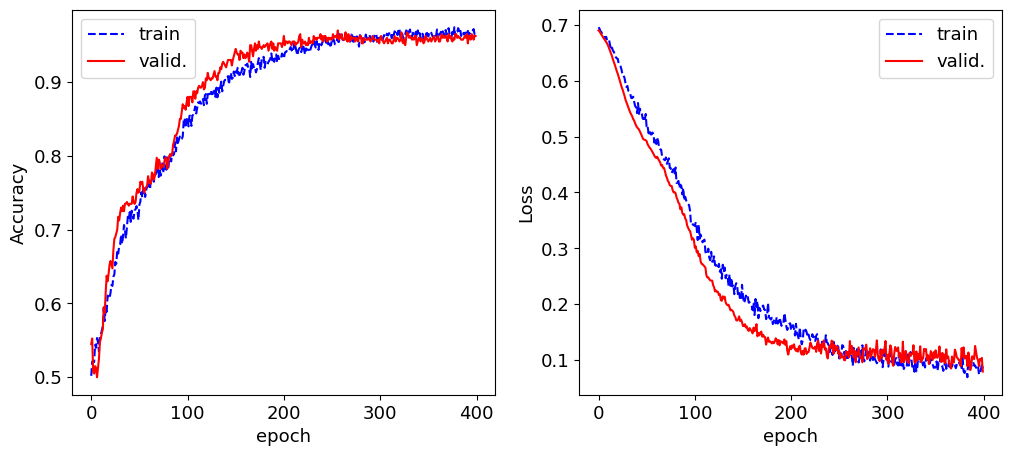

In [14]:
fig,AX=plt.subplots(1,2,figsize=(12,5.))
ax=AX[0]
ax.plot(fit.history['accuracy'],label="train",c="b",ls="--")
ax.plot(fit.history['val_accuracy'],label="valid.",c="r")
ax.set_xlabel('epoch')
ax.set_ylabel("Accuracy")
ax.legend()
ax=AX[1]
ax.plot(fit.history['loss'],label="train",c="b",ls="--")
ax.plot(fit.history['val_loss'],label="valid.",c="r")
ax.set_xlabel('epoch')
ax.set_ylabel("Loss")
ax.legend() # in loss if validation goes up u have overfitting , one could have stopped around 250 epochs

## Grid to show preditions

319/319 ━━━━━━━━━━━━━━━━━━━━ 0s 669us/step


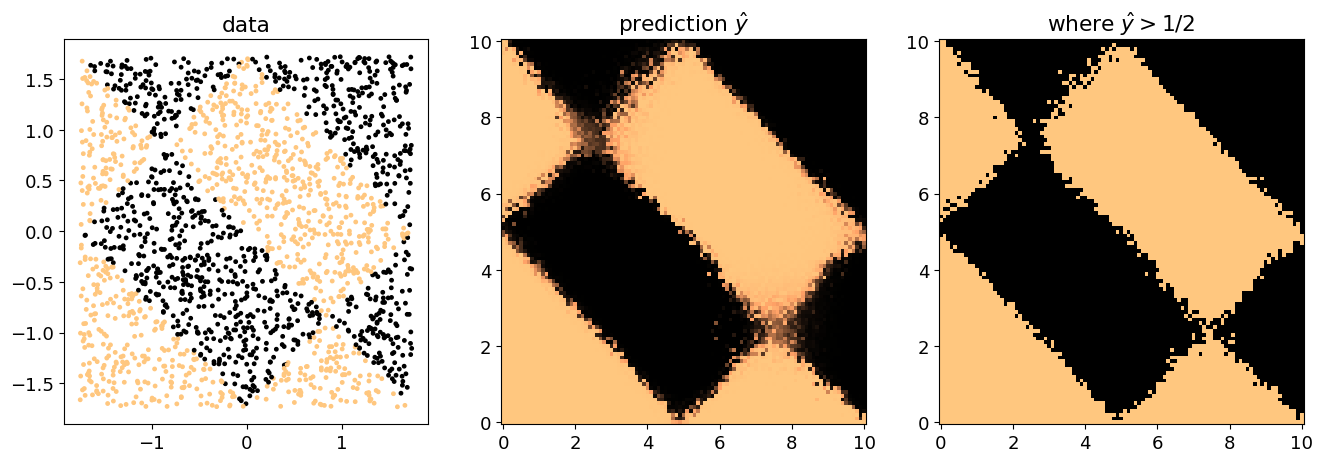

remember: these ar 2 out of L=8 dimensions, of which L-2 contain random noise


In [15]:
dX = .1
X1 = np.arange(0,10+dX, dX)
LG = len(X1)
X, Y = np.meshgrid(X1, X1)
allXY = np.reshape((np.array((X,Y)).T),(LG**2,2))
grid = np.random.rand(LG**2,L)*B
grid[:,:2] = allXY
grid_r=Standardize(grid,x_mean,x_std)

pred = model.predict(grid_r)

fig,AX=plt.subplots(1,3,figsize=(16,5.))
ax=AX[0]
ax.scatter(x[:,0],x[:,1],c=y,s=6)
ax.set_title("data")
ax=AX[1]
ax.pcolormesh(X1,X1,pred.reshape((LG, LG)))
ax.set_title("prediction $\\hat y$")
ax=AX[2]
pred01=np.copy(pred)
pred01[pred>0.5]=1
pred01[pred<=0.5]=0
ax.pcolormesh(X1,X1,pred01.reshape((LG, LG)))
ax.set_title("where $\\hat y > 1/2$")
plt.show()
print(f"remember: these ar 2 out of L={L} dimensions, of which L-2 contain random noise")

see binary cross entropy in mehta 7.
kullbacl - lebler divergence

we wil compute in for each smaple with 

cross entropy will be 


aggiungere dati con un quadrilatero

In [19]:
import keras_tuner

model

<Sequential name=sequential, built=True>